Book 1  
Chapter 8 Functions in Python
### 模仿学习别人的代码

#### 找到源代码

In [4]:
# 1.
import statistics

# ?? statistics.linear_regression
# ?? 获取函数或模块的帮助文档、源代码

# help(statistics.linear_regression)
# 获取函数的帮助文档

In [5]:
# 2.
# https://docs.python.org/3/library/statistics.html
# https://github.com/python/cpython/blob/main/Lib/statistics.py

In [6]:
# 3.
# /opt/homebrew/anaconda3/lib/python3.11/statistics.py

# import statistics
# print(statistics.__file__)

In [7]:
# 4.
# 在 Spyder 中利用 ctrl + O 打开 statistics.linear_regression

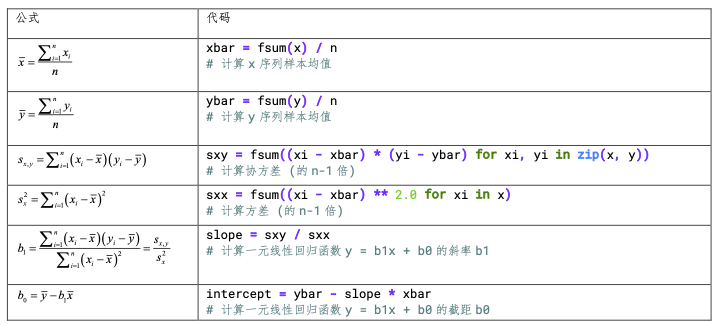

In [9]:
from math import fsum
from collections import namedtuple

def linear_regression(x, y, /):
    n = len(x)

    if len(y) != n:
        raise StatisticsError('linear regression requires that both inputs have same number of data points')
    if n < 2:
        raise StatisticsError('linear regression requires at least two data points')

    xbar = fsum(x) / n # x 的平均值
    ybar = fsum(y) / n # y 的平均值

    sxy = fsum((xi - xbar) * (yi - ybar) for xi, yi in zip(x, y)) # x 和 y 之间的样本协方差(的 n – 1 倍)，用于衡量这两组数据之间的线性关系
    sxx = fsum((xi - xbar) ** 2.0 for xi in x) # x 的样本方差(的 n – 1 倍)，用于衡量数据点相对于均值的分散程度

    try:
        slope = sxy / sxx # 计算一元 OLS 线性回归模型 y = b1x + b0 斜率 b1
        # equivalent to: covariance(x, y) / variance(x)
    except ZeroDivisionError:
        raise StatisticsError('x is constant')

    intercept = ybar - slope * xbar # 计算一元 OLS 线性回归模型 y = b1x + b0 截距 b0

    LinearRegression = namedtuple('LinearRegression', ('slope', 'intercept'))
    # 用 Python 中 collections 模块中 namedtuple 函数创建的具有命名字段的轻量级的类似元组的数据结构

    return LinearRegression(slope=slope, intercept=intercept)

In [10]:
print(linear_regression([1, 2, 3], [1, 2, 3]))

LinearRegression(slope=1.0, intercept=0.0)


In [11]:
print(linear_regression([1, 2, 3], [1, 2, 3]).slope)

1.0


In [12]:
print(linear_regression([1, 2, 3], [1, 2, 3])[0])

1.0
